In [2]:
import tensorflow as tf

In [3]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Hello, TensorFlow!


In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f9de41b5c50>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f9de41b5c90>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f9de41b5e90>)

In [ ]:
dir(mnist)

In [ ]:
type(mnist)

In [ ]:
import numpy as np

# 添加层
def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# 1.训练的数据
# Make up some real data 
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# 2.定义节点准备接收数据
# define placeholder for inputs to network  
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

# 3.定义神经层：隐藏层和预测层
# add hidden layer 输入值是 xs，在隐藏层有 10 个神经元   
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer 输入值是隐藏层 l1，在预测层输出 1 个结果
prediction = add_layer(l1, 10, 1, activation_function=None)

# 4.定义 loss 表达式
# the error between prediciton and real data    
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))

# 5.选择 optimizer 使 loss 达到最小                   
# 这一行定义了用什么方式去减少 loss，学习率是 0.1       
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


# important step 对所有变量进行初始化
init = tf.initialize_all_variables()
sess = tf.Session()
# 上面定义的都没有运算，直到 sess.run 才会开始运算
sess.run(init)

# 迭代 1000 次学习，sess.run optimizer
for i in range(1000):
    # training train_step 和 loss 都是由 placeholder 定义的运算，所以这里要用 feed 传入参数
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

# 作者：不会停的蜗牛
# 链接：http://www.jianshu.com/p/e112012a4b2d
# 來源：简书


In [6]:

# Import Numpy, TensorFlow, TFLearn, and MNIST data
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

In [7]:

# Retrieve the training and test data
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


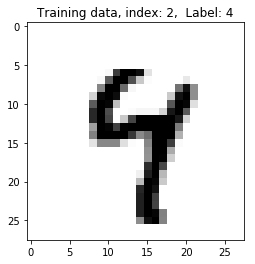

In [14]:

# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def show_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(2)

In [9]:
# Define the neural network
def build_model():
    # This resets all parameters and variables, leave this here
    tf.reset_default_graph()
    
    # Inputs
    net = tflearn.input_data([None, trainX.shape[1]])

    # Hidden layer(s)
    net = tflearn.fully_connected(net, 128, activation='ReLU')
    net = tflearn.fully_connected(net, 32, activation='ReLU')
    
    # Output layer and training model
    net = tflearn.fully_connected(net, 10, activation='softmax')
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
    
    model = tflearn.DNN(net)
    return model

In [15]:
trainY[:2]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:

# Build the model
model = build_model()

In [ ]:
trainY[:4]

In [ ]:
# Training
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=100)

In [ ]:
# Compare the labels that our model predicts with the actual labels

# Find the indices of the most confident prediction for each item. That tells us the predicted digit for that sample.
predictions = np.array(model.predict(testX)).argmax(axis=1)

# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

In [ ]:
n=100
model.predict([trainX[n]])

In [ ]:
show_digit(n)